In [6]:
fire13 = fire12.groupby("YEAR")["ANN"].count()
fire13

YEAR
2001     21
2002     23
2003     36
2004     33
2005     51
2006     75
2007     36
2008     96
2009    102
2010     17
2011     73
2012    215
2013     27
2014     32
2015     39
2016     31
2017     51
2018     16
2019    205
2020     20
2021     22
2022     88
Name: ANN, dtype: int64

In [15]:
# Encode categorical variables using one-hot encoding
#fire_data = pd.get_dummies(fire_data, columns=['satellite', 'acq_date','instrument', 'daynight'])
#weather_data = pd.get_dummies(weather_data, columns=['PARAMETER'])
#weather_data1 = pd.get_dummies(weather_data1, columns=['PARAMETER'])
#precipitation_data = pd.get_dummies(precipitation_data, columns=['PARAMETER'])
#precipitation_data2 = pd.get_dummies(precipitation_data2, columns=['PARAMETER'])
#landsurface_temp = pd.get_dummies(landsurface_temp, columns=['PARAMETER'])
#temp = pd.get_dummies(temp, columns=['PARAMETER'])
#relative_humidity = pd.get_dummies(relative_humidity, columns=['PARAMETER'])
#specific_humidity = pd.get_dummies(specific_humidity, columns=['PARAMETER'])
#soilwetness_surface = pd.get_dummies(soilwetness_surface, columns=['PARAMETER'])
#soilwetness_rootzone = pd.get_dummies(soilwetness_rootzone, columns=['PARAMETER'])
#wind_direction = pd.get_dummies(wind_direction, columns=['PARAMETER'])
#wind_speed = pd.get_dummies(wind_speed, columns=['PARAMETER'])
#yearly_NDVI = pd.get_dummies(weather_data, columns=['PARAMETER'])
#monthly_NDVI = pd.get_dummies(weather_data, columns=['PARAMETER'])


In [31]:
import pandas as pd

fire_data = pd.read_csv('classified_data2.csv')
fire_data.head()




,latitude,longitude,acq_time,YEAR,month,day,ANN,LISA_cluster
0,0.2122,37.7333,801,2001,8,11,21,4
1,0.1272,37.5555,2023,2001,8,11,21,2
2,-0.0990,37.4320,843,2001,9,13,21,2
3,-0.1280,37.4616,843,2001,9,13,21,3
4,-0.1350,37.4570,843,2001,9,13,21,3


In [32]:
fire_data2= fire_data.drop('month', axis=1)

fire_data2

,latitude,longitude,acq_time,YEAR,day,ANN,LISA_cluster
0,0.2122,37.7333,801,2001,11,21,4
1,0.1272,37.5555,2023,2001,11,21,2
2,-0.0990,37.4320,843,2001,13,21,2
3,-0.1280,37.4616,843,2001,13,21,3
4,-0.1350,37.4570,843,2001,13,21,3
...,...,...,...,...,...,...,...
1304,0.1093,37.2822,756,2022,29,88,1
1305,0.1203,37.4401,811,2022,24,88,1
1306,-0.4139,36.9572,1141,2022,24,88,1
1307,0.0992,37.7738,745,2022,29,88,1


In [33]:
fire_data3 = fire_data2.drop('day', axis = 1)

In [34]:
fire_data3.head()

,latitude,longitude,acq_time,YEAR,ANN,LISA_cluster
0,0.2122,37.7333,801,2001,21,4
1,0.1272,37.5555,2023,2001,21,2
2,-0.0990,37.4320,843,2001,21,2
3,-0.1280,37.4616,843,2001,21,3
4,-0.1350,37.4570,843,2001,21,3


In [60]:
#Fire = pd.read_csv('annual_ann.csv')

In [61]:
#Fire

,YEAR,ANN
0,2001,21
1,2002,23
2,2003,36
3,2004,33
4,2005,51
5,2006,75
6,2007,36
7,2008,96
8,2009,102
9,2010,17


In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load fire data and weather data
fire_data = fire_data3
weather_data = pd.read_csv('Precipitation2.csv')


#weather_data1 = pd.read_csv("RELATIVE HUMIDITY.csv")
#precipitation_data2 = pd.read_csv("Monthly_Precipitation_Mt_Kenya_Forest.csv")
landsurface_temp = pd.read_csv("LST2.csv")
temp = pd.read_csv("Earth SKIN Temp2.csv")
relative_humidity = pd.read_csv("Relative_Humidity2.csv")
specific_humidity = pd.read_csv("Specific_Humidity2.csv")
soilwetness_surface = pd.read_csv("SoilWetness_Surface2.csv")
soilwetness_rootzone = pd.read_csv("SoilWetness_Rootzone2.csv")
wind_direction = pd.read_csv("Wind_Direction2.csv")
wind_speed = pd.read_csv("Wind_Speed2.csv")
yearly_NDVI = pd.read_csv("Yearly_Thresholds_Mt_Kenya_Forest22.csv")
#monthly_NDVI = pd.read_csv("Monthly_NDVI_Mt_Kenya_Forest.csv")



# Merge datasets based on common columns

merged_data = pd.merge(fire_data, weather_data, on=['YEAR'])
merged_data = pd.merge(merged_data, landsurface_temp, on=['YEAR'])
merged_data = pd.merge(merged_data, temp, on=['YEAR'])
merged_data = pd.merge(merged_data, relative_humidity, on=['YEAR']) 
merged_data = pd.merge(merged_data, specific_humidity, on=['YEAR'])
merged_data = pd.merge(merged_data, yearly_NDVI, on=['YEAR'])
#merged_data = pd.merge(merged_data, soilwetness_surface, on=['YEAR']) 
#merged_data = pd.merge(merged_data, soilwetness_rootzone, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_direction, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_speed, on=['YEAR']) 


merged_data.head()

,latitude,longitude,acq_time,YEAR,ANN,LISA_cluster,Precipitation,LST,TS,RelaHum,Spechum,NDVI
0,0.2122,37.7333,801,2001,21,4,5.27,18.64,18.69,72.75,10.74,0.514756
1,0.2122,37.7333,801,2001,21,4,5.27,18.64,18.69,72.75,10.74,0.514756
2,0.2122,37.7333,801,2001,21,4,5.27,18.64,18.69,72.75,10.74,0.514756
3,0.2122,37.7333,801,2001,21,4,5.27,18.64,18.69,72.75,10.74,0.514756
4,0.2122,37.7333,801,2001,21,4,5.27,18.64,18.69,72.75,10.74,0.514756


In [91]:
# Feature selection
features = ['latitude','longitude','YEAR','LISA_cluster','Precipitation', 'LST', 'TS', 'RelaHum', 'Spechum', 'NDVI']  # Add relevant features
X = merged_data[features]
y = merged_data['ANN']


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [93]:
#pip install xgboost


In [94]:
import xgboost as xgb
#model = xgb.XGBRegressor()
#model.fit(X_train, y_train)


In [95]:
model = xgb.XGBRegressor()


In [96]:
model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)


In [97]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [98]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print("Root Mean Squared Error:", rmse)
print("Mean Squared Error (MSE):", mse)

Root Mean Squared Error: 0.2939319567078427
Mean Squared Error (MSE): 0.08639599517410114


In [126]:
# Save the model using joblib
joblib.dump(model, 'xgb_model1.joblib')

# Save the model using pickle
with open('xgb_model1.pkl', 'wb') as file:
    pickle.dump(model, file)

In [128]:
# Load the model using joblib
loaded_model_joblib = joblib.load('xgb_model1.joblib')

# Load the model using pickle
with open('xgb_model1.pkl', 'rb') as file:
    loaded_model_pickle = pickle.load(file)

# Make predictions using the loaded models
predictions_joblib = loaded_model_joblib.predict(X_test)
predictions_pickle = loaded_model_pickle.predict(X_test)

# Print predictions
print(predictions_joblib)
print(predictions_pickle)


NotFittedError: need to call fit or load_model beforehand

In [102]:
import pandas as pd
# Forecast ANN values for the years 2020 to 2030
years_forecast = range(2020, 2033)
month_forecast = range(1,12)


# Define assumed or estimated values for features
forecast_years = range(2020, 2022)
#forecast_months = range(1,13)
#latitude = 0.27  # Example latitude value
#longitude = 37.2  # Example longitude value
#day = 21
LISA_cluster = range(1,5)
precipitation = [5] * len(forecast_years)  # Example precipitation values (assuming constant)
lst = [19] * len(forecast_years)  # Example LST values (assuming constant)
ts = [19.20] * len(forecast_years)  # Example TS values (assuming constant)
relahum = [70] * len(forecast_years)  # Example RelaHum values (assuming constant)
spechum = [10] * len(forecast_years)  # Example Spechum values (assuming constant)
ndvi = [0.6] * len(forecast_years)  # Example NDVI values (assuming constant)



# Create the forecast_data DataFrame
forecast_data = pd.DataFrame({
    'latitude': [latitude] * len(forecast_years),
    'longitude': [longitude] * len(forecast_years),
    'YEAR': forecast_years,
    #'month':month,
    #'day':day,
    #'LISA_cluster':LISA_cluster,
    'Precipitation': precipitation,
    'LST': lst,
    'TS': ts,
    'RelaHum': relahum,
    'Spechum': spechum,
    'NDVI': ndvi
})

print(forecast_data)


   latitude  longitude  YEAR  Precipitation  LST    TS  RelaHum  Spechum  NDVI
0      0.27       37.2  2020              5   19  19.2       70       10   0.6
1      0.27       37.2  2021              5   19  19.2       70       10   0.6


In [103]:
import matplotlib.pyplot as plt

# Make predictions for the forecast data
forecast_ann = model.predict(forecast_data)

# Plotting the existing ANN values and forecasted values
plt.figure(figsize=(12, 6))

# Plotting existing ANN values
plt.scatter(merged_data['YEAR'], merged_data['ANN'], color='black', label='Existing ANN Values', marker='x')

# Plotting forecasted ANN values
plt.plot(years_forecast, forecast_ann, 'b-', label='Forecasted ANN Values')
#plt.plot(month_forecast, forecast_ann, 'b-', label='Forecasted ANN Values')
#plt.scatter(years_forecast, forecast_ann, 'b-', label='Forecasted ANN Values')


# Adding labels and title
plt.xlabel('Year')
plt.ylabel('ANN')
plt.title('ANN Forecast (2020-2030)')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



ValueError: feature_names mismatch: ['latitude', 'longitude', 'YEAR', 'LISA_cluster', 'Precipitation', 'LST', 'TS', 'RelaHum', 'Spechum', 'NDVI'] ['latitude', 'longitude', 'YEAR', 'Precipitation', 'LST', 'TS', 'RelaHum', 'Spechum', 'NDVI']
expected LISA_cluster in input data

In [104]:
forecast_ann.view()

array([99.7684, 99.7684], dtype=float32)

In [105]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd

# Assuming merged_data contains your historical data
# Extract 'YEAR' and 'ANN' features for training
X_train_year = merged_data[['YEAR']].values  # Extract 'YEAR' as feature for training
y_train_ann = merged_data['ANN'].values  # Target variable (ANN values)

# Initialize the Gradient Boosting Regressor model
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gradient_boosting.fit(X_train_year, y_train_ann)

# Generate future timestamps for the next five years starting from 2020
future_years = np.arange(2020, 2020 + 10).reshape(-1, 1)  # Next five years starting from 2020

# Predict ANN values for the next five years using the trained model
predicted_ann_future_gb = gradient_boosting.predict(future_years)

# Round the predicted fire occurrences to the nearest integer
predicted_ann_future_gb_rounded = np.round(predicted_ann_future_gb).astype(int)
print("Predicted ANN Values for the Next Five Years (Gradient Boosting Regressor):")
for year, ann_value in zip(future_years.flatten(), predicted_ann_future_gb_rounded):
    print(f"Year {year}: Predicted ANN = {ann_value:.0f}")

Predicted ANN Values for the Next Five Years (Gradient Boosting Regressor):
Year 2020: Predicted ANN = 21
Year 2021: Predicted ANN = 23
Year 2022: Predicted ANN = 88
Year 2023: Predicted ANN = 88
Year 2024: Predicted ANN = 88
Year 2025: Predicted ANN = 88
Year 2026: Predicted ANN = 88
Year 2027: Predicted ANN = 88
Year 2028: Predicted ANN = 88
Year 2029: Predicted ANN = 88


In [106]:
# Round the predicted fire occurrences to the nearest integer
predicted_ann_future_gb_rounded = np.round(predicted_ann_future_gb).astype(int)
print("Predicted ANN Values for the Next Five Years (Gradient Boosting Regressor):")
for year, ann_value in zip(future_years.flatten(), predicted_ann_future_gb_rounded):
    print(f"Year {year}: Predicted ANN = {ann_value:.0f}")

Predicted ANN Values for the Next Five Years (Gradient Boosting Regressor):
Year 2020: Predicted ANN = 21
Year 2021: Predicted ANN = 23
Year 2022: Predicted ANN = 88
Year 2023: Predicted ANN = 88
Year 2024: Predicted ANN = 88
Year 2025: Predicted ANN = 88
Year 2026: Predicted ANN = 88
Year 2027: Predicted ANN = 88
Year 2028: Predicted ANN = 88
Year 2029: Predicted ANN = 88


In [107]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd

# Assuming merged_data contains your historical data
# Extract 'YEAR' and 'LISA_cluster' features for training
X_train_year = merged_data[['YEAR', 'LISA_cluster']].values  # Extract 'YEAR' and 'LISA_cluster' as features for training
y_train_ann = merged_data['ANN'].values  # Target variable (ANN values)

# Initialize the Gradient Boosting Regressor model
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gradient_boosting.fit(X_train_year, y_train_ann)

# Generate future timestamps for the next five years starting from 2020
future_years = np.arange(2020, 2020 + 10).reshape(-1, 1)  # Next five years starting from 2020

# Assume you have future 'LISA_cluster' data as well for prediction (similar to 'YEAR')
future_lisa_clusters = np.arange(1, 1+3).reshape(-1, 1)  # Example random 'LISA_cluster' values for prediction

# Concatenate future 'YEAR' and 'LISA_cluster' data for prediction
future_data = np.concatenate((future_years, future_lisa_clusters), axis=1)

# Predict ANN values for the next five years using the trained model
predicted_ann_future_gb = gradient_boosting.predict(future_data)

# Round the predicted fire occurrences to the nearest integer
predicted_ann_future_gb_rounded = np.round(predicted_ann_future_gb).astype(int)

print("Predicted ANN Values for the Next Five Years (Gradient Boosting Regressor):")
for year, ann_value in zip(future_years.flatten(), predicted_ann_future_gb_rounded):
    print(f"Year {year}: Predicted ANN = {ann_value}")


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 10 and the array at index 1 has size 3

In [108]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Assuming merged_data contains your historical data
# Extract 'YEAR' and 'LISA_cluster' features for training
X_train_year = merged_data[['YEAR', 'LISA_cluster']].values  # Extract 'YEAR' and 'LISA_cluster' as features for training
y_train_ann = merged_data['ANN'].values  # Target variable (ANN values)

# Initialize the Gradient Boosting Regressor model
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gradient_boosting.fit(X_train_year, y_train_ann)

# Generate future timestamps for the next five years starting from 2020
future_years = np.arange(2020, 2020 + 10).reshape(-1, 1)  # Next ten years starting from 2020

# Assume you have future 'LISA_cluster' data as well for prediction (similar to 'YEAR')
future_lisa_clusters = np.tile(np.arange(1, 1 + 4), (len(future_years) // 4 + 1))[:len(future_years)]

# Concatenate future 'YEAR' and 'LISA_cluster' data for prediction
future_data = np.concatenate((future_years, future_lisa_clusters[:, np.newaxis]), axis=1)

# Predict ANN values for the next ten years using the trained model
predicted_ann_future_gb = gradient_boosting.predict(future_data)

# Round the predicted ANN values to the nearest integer
predicted_ann_future_gb_rounded = np.round(predicted_ann_future_gb).astype(int)

print("Predicted ANN Values for the Next Ten Years (Gradient Boosting Regressor):")
for year, ann_value in zip(future_years.flatten(), predicted_ann_future_gb_rounded):
    print(f"Year {year}: Predicted ANN = {ann_value}")


Predicted ANN Values for the Next Ten Years (Gradient Boosting Regressor):
Year 2020: Predicted ANN = 21
Year 2021: Predicted ANN = 22
Year 2022: Predicted ANN = 88
Year 2023: Predicted ANN = 88
Year 2024: Predicted ANN = 88
Year 2025: Predicted ANN = 88
Year 2026: Predicted ANN = 88
Year 2027: Predicted ANN = 88
Year 2028: Predicted ANN = 88
Year 2029: Predicted ANN = 88


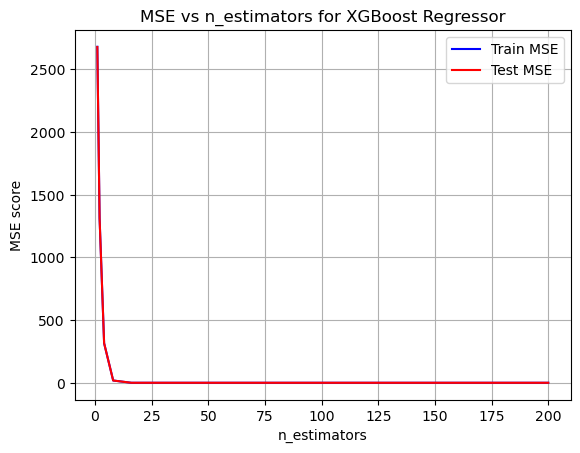

In [109]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_mse_results = []
test_mse_results = []

for estimator in n_estimators:
    xgb_model = xgb.XGBRegressor(n_estimators=estimator)
    xgb_model.fit(X_train, y_train)
    
    train_pred = xgb_model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_pred)
    train_mse_results.append(train_mse)
    
    test_pred = xgb_model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_pred)
    test_mse_results.append(test_mse)

plt.plot(n_estimators, train_mse_results, "b", label="Train MSE")
plt.plot(n_estimators, test_mse_results, "r", label="Test MSE")
plt.legend()
plt.ylabel("MSE score")
plt.xlabel("n_estimators")
plt.title("MSE vs n_estimators for XGBoost Regressor")
plt.grid()
plt.show()


Estimators: 1, Train MSE: 2679.1747402042606, Test MSE: 2677.447217477737
Estimators: 2, Train MSE: 1313.1892159908234, Test MSE: 1312.338420949378
Estimators: 4, Train MSE: 315.29809662322947, Test MSE: 315.0938188340833
Estimators: 8, Train MSE: 18.17647276213759, Test MSE: 18.164696308054346
Estimators: 16, Train MSE: 0.06040793881958411, Test MSE: 0.06036880007570744
Estimators: 32, Train MSE: 6.741123212089705e-07, Test MSE: 6.736658375346796e-07
Estimators: 64, Train MSE: 9.723778973826632e-11, Test MSE: 9.720120379347622e-11
Estimators: 100, Train MSE: 9.723778973826632e-11, Test MSE: 9.720120379347622e-11
Estimators: 200, Train MSE: 9.723778973826632e-11, Test MSE: 9.720120379347622e-11


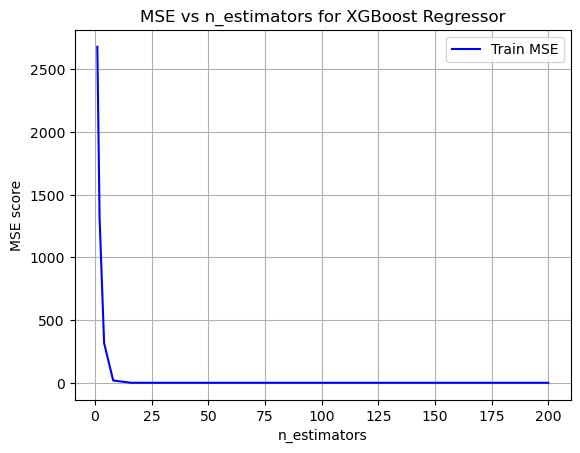

In [110]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_mse_results = []
test_mse_results = []

for estimator in n_estimators:
    xgb_model = xgb.XGBRegressor(n_estimators=estimator)
    xgb_model.fit(X_train, y_train)
    
    train_pred = xgb_model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_pred)
    train_mse_results.append(train_mse)
    
    test_pred = xgb_model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_pred)
    test_mse_results.append(test_mse)

    print(f"Estimators: {estimator}, Train MSE: {train_mse}, Test MSE: {test_mse}")

plt.plot(n_estimators, train_mse_results, "b", label="Train MSE")
#plt.plot(n_estimators, test_mse_results, "r", label="Test MSE")
plt.legend()
plt.ylabel("MSE score")
plt.xlabel("n_estimators")
plt.title("MSE vs n_estimators for XGBoost Regressor")
plt.grid()
plt.show()


<Figure size 1000x600 with 0 Axes>

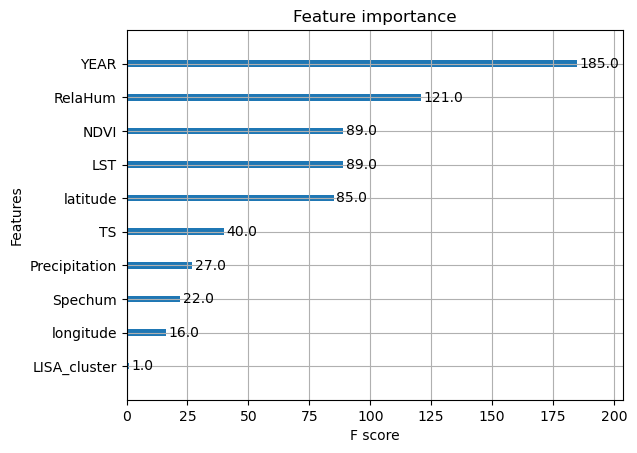

In [111]:
# Plot feature importances
plt.figure(figsize=(10, 6))
xgb.plot_importance(model)
plt.show()


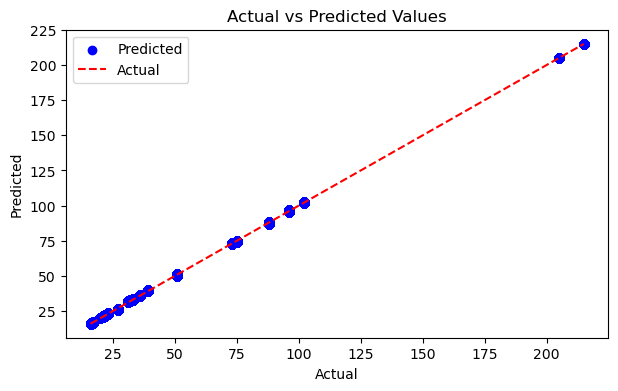

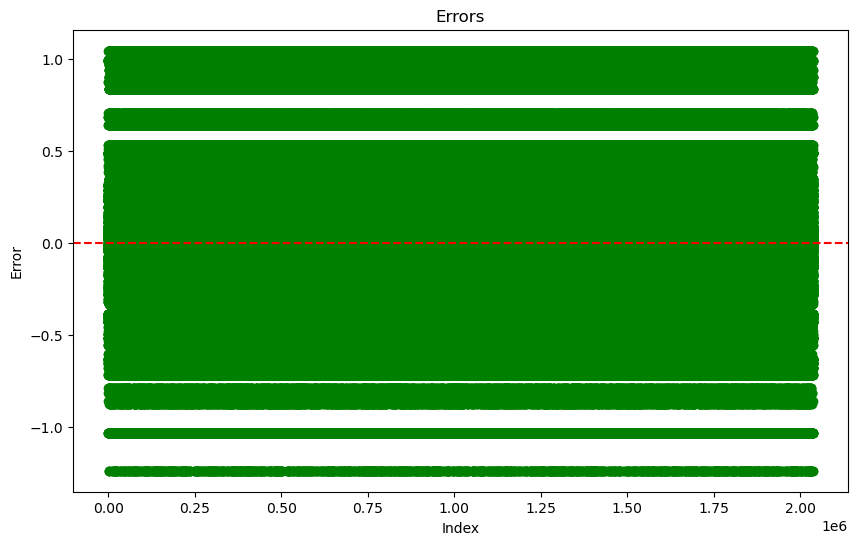

In [112]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(7, 4))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()



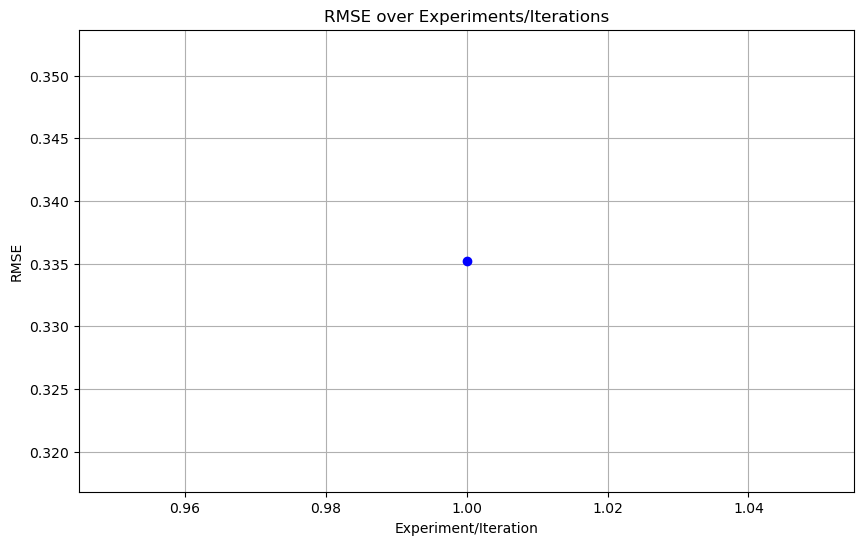

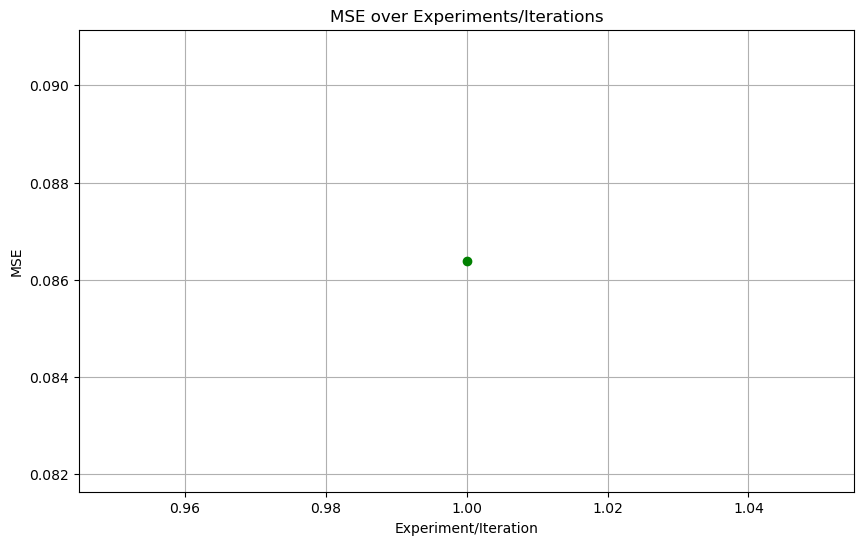

In [114]:
import matplotlib.pyplot as plt

# Assuming you have a list or array of RMSE values for different experiments or iterations
rmse_values = [0.33522982244123617]  # Replace [...] with your actual RMSE values
mse_values = [0.08639279816508214]   # Replace [...] with your actual MSE values

#fig,ax = plt.subplots( figsize=(12, 10))


# Plotting RMSE
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rmse_values) + 1), rmse_values, marker='o', color='blue', linestyle='-')
plt.xlabel('Experiment/Iteration')
plt.ylabel('RMSE')
plt.title('RMSE over Experiments/Iterations')
plt.grid(True)
plt.show()

# Plotting MSE
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(mse_values) + 1), mse_values, marker='o', color='green', linestyle='-')
plt.xlabel('Experiment/Iteration')
plt.ylabel('MSE')
plt.title('MSE over Experiments/Iterations')
plt.grid(True)
plt.show()


C:\Users\DANIEL\AppData\Local\Temp\ipykernel_1756\2517428822.py:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


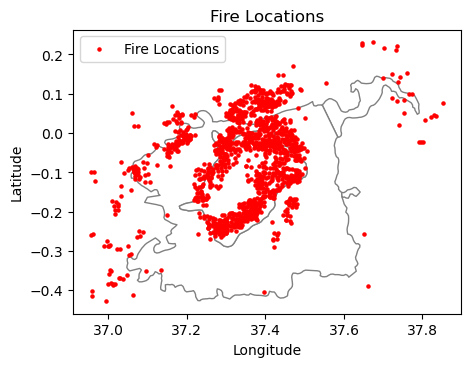

In [115]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming you have fire data in a DataFrame named 'fire_data'
# Assuming you have weather data in a DataFrame named 'weather_data'
# Load your shapefile of the region
region_shapefile = 'True_forest.shp'
region = gpd.read_file(region_shapefile)

# Convert fire_data to GeoDataFrame
gdf_fire = gpd.GeoDataFrame(fire_data, geometry=gpd.points_from_xy(fire_data.longitude, fire_data.latitude))

# Create base map using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the base map
ax = region.plot(figsize=(5, 6), color='white', edgecolor='gray')

# Plot fires on the map
gdf_fire.plot(ax=ax, color='red', markersize=5, label='Fire Locations')

# Add legend
plt.legend()

# Add title and labels
plt.title('Fire Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


In [117]:
import joblib
import xgboost as xgb

In [118]:
joblib.dump(model, 'xgb_model.joblib')

['xgb_model.joblib']

In [119]:
# Load the model from the file
loaded_model = joblib.load('xgb_model.joblib')

In [125]:
import pickle
import xgboost as xgb

# Define the model
model = xgb.XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)

# Train the model (assuming you have X_train and y_train)
# model.fit(X_train, y_train)

# Save the model to a file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(model, file)

    
# Load the model from the file
with open('xgb_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model to make predictions (assuming you have X_test)
#predictions = loaded_model.predict(X_test)


In [130]:
pip install Flask


Note: you may need to restart the kernel to use updated packages.


In [131]:
from flask import Flask, render_template, request
import pickle

app = Flask(__name__)

# Load the location classifier model
with open('xgb_model.pkl', 'rb') as f:
    location_classifier = pickle.load(f)

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        # Extract user inputs from the form
        user_latitude = float(request.form['latitude'])
        user_longitude = float(request.form['longitude'])
        user_year = int(request.form['year'])
        user_lisa_cluster = float(request.form['LISA_cluster'])
        user_precipitation = float(request.form['precipitation'])
        user_lst = float(request.form['LST'])
        user_ts = float(request.form['TS'])
        user_relahum = float(request.form['RelaHum'])
        user_spechum = float(request.form['Spechum'])
        user_ndvi = float(request.form['NDVI'])
        
        # Combine the inputs into a single list
        user_inputs = [[user_latitude, user_longitude, user_year, user_lisa_cluster, user_precipitation, user_lst, user_ts, user_relahum, user_spechum, user_ndvi]]
        
        # Make predictions using the location classifier model
        location_prediction = location_classifier.predict(user_inputs)

        # Render the results page with predictions
        return render_template('result.html', location_prediction=location_prediction[0])

    # Render the input form
    return render_template('index.html')

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [132]:
from flask import Flask, render_template, request
import pickle

app = Flask(__name__)

try:
    # Load the location classifier model
    with open('xgb_model.pkl', 'rb')as f:
        location_classifier = pickle.load(f)
except Exception as e:
    print(f"Error loading model: {e}")
    exit(1)

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        try:
            # Extract user inputs from the form
            user_latitude = float(request.form['latitude'])
            user_longitude = float(request.form['longitude'])
            user_year = int(request.form['year'])
            user_lisa_cluster = float(request.form['LISA_cluster'])
            user_precipitation = float(request.form['precipitation'])
            user_lst = float(request.form['LST'])
            user_ts = float(request.form['TS'])
            user_relahum = float(request.form['RelaHum'])
            user_spechum = float(request.form['Spechum'])
            user_ndvi = float(request.form['NDVI'])

            # Combine the inputs into a single list
            user_inputs = [[user_latitude, user_longitude, user_year, user_lisa_cluster, user_precipitation, user_lst, user_ts, user_relahum, user_spechum, user_ndvi]]

            # Make predictions using the location classifier model
            location_prediction = location_classifier.predict(user_inputs)

            # Render the results page with predictions
            return render_template('result.html', location_prediction=location_prediction[0])
        except Exception as e:
            print(f"Error during prediction: {e}")
            return render_template('index.html', error=str(e))

    # Render the input form
    return render_template('index.html')

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [135]:
pip install waitress


  Obtaining dependency information for waitress from https://files.pythonhosted.org/packages/5b/a9/485c953a1ac4cb98c28e41fd2c7184072df36bbf99734a51d44d04176878/waitress-3.0.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/56.7 kB ? eta -:--:--
   ---------------------------------------- 0.0/56.7 kB ? eta -:--:--
   ------- -------------------------------- 10.2/56.7 kB ? eta -:--:--
   -------------- ------------------------- 20.5/56.7 kB 131.3 kB/s eta 0:00:01
   -------------- ------------------------- 20.5/56.7 kB 131.3 kB/s eta 0:00:01
   --------------------- ------------------ 30.7/56.7 kB 131.3 kB/s eta 0:00:01
   ---------------------------- ----------- 41.0/56.7 kB 164.3 kB/s eta 0:00:01
   ---------------------------------------- 56.7/56.7 kB 175.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

fire_data = pd.read_csv('classified_data2.csv')
fire_data.head()


,latitude,longitude,acq_time,YEAR,month,day,ANN,LISA_cluster
0,0.2122,37.7333,801,2001,8,11,21,4
1,0.1272,37.5555,2023,2001,8,11,21,2
2,-0.0990,37.4320,843,2001,9,13,21,2
3,-0.1280,37.4616,843,2001,9,13,21,3
4,-0.1350,37.4570,843,2001,9,13,21,3


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load fire data and weather data
fire_data = fire_data
weather_data = pd.read_csv('Precipitation2.csv')


#weather_data1 = pd.read_csv("RELATIVE HUMIDITY.csv")
#precipitation_data2 = pd.read_csv("Monthly_Precipitation_Mt_Kenya_Forest.csv")
landsurface_temp = pd.read_csv("LST2.csv")
temp = pd.read_csv("Earth SKIN Temp2.csv")
relative_humidity = pd.read_csv("Relative_Humidity2.csv")
specific_humidity = pd.read_csv("Specific_Humidity2.csv")
soilwetness_surface = pd.read_csv("SoilWetness_Surface2.csv")
soilwetness_rootzone = pd.read_csv("SoilWetness_Rootzone2.csv")
wind_direction = pd.read_csv("Wind_Direction2.csv")
wind_speed = pd.read_csv("Wind_Speed2.csv")
yearly_NDVI = pd.read_csv("Yearly_Thresholds_Mt_Kenya_Forest22.csv")
#monthly_NDVI = pd.read_csv("Monthly_NDVI_Mt_Kenya_Forest.csv")



# Merge datasets based on common columns

merged_data = pd.merge(fire_data, weather_data, on=['YEAR'])
merged_data = pd.merge(merged_data, landsurface_temp, on=['YEAR'])
merged_data = pd.merge(merged_data, temp, on=['YEAR'])
merged_data = pd.merge(merged_data, relative_humidity, on=['YEAR']) 
merged_data = pd.merge(merged_data, specific_humidity, on=['YEAR'])
merged_data = pd.merge(merged_data, yearly_NDVI, on=['YEAR'])
#merged_data = pd.merge(merged_data, soilwetness_surface, on=['YEAR']) 
#merged_data = pd.merge(merged_data, soilwetness_rootzone, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_direction, on=['YEAR']) 
#merged_data = pd.merge(merged_data, wind_speed, on=['YEAR']) 


merged_data.head()

,latitude,longitude,acq_time,YEAR,month,day,ANN,LISA_cluster,Precipitation,LST,TS,RelaHum,Spechum,NDVI
0,0.2122,37.7333,801,2001,8,11,21,4,5.27,18.64,18.69,72.75,10.74,0.514756
1,0.2122,37.7333,801,2001,8,11,21,4,5.27,18.64,18.69,72.75,10.74,0.514756
2,0.2122,37.7333,801,2001,8,11,21,4,5.27,18.64,18.69,72.75,10.74,0.514756
3,0.2122,37.7333,801,2001,8,11,21,4,5.27,18.64,18.69,72.75,10.74,0.514756
4,0.2122,37.7333,801,2001,8,11,21,4,5.27,18.64,18.69,72.75,10.74,0.514756


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'Fire occurrence' is your target variable
X = merged_data.drop(['latitude', 'longitude', 'acq_time','YEAR','month','day','ANN'], axis=1)  # Features
y = merged_data['ANN']  # Target variable

# Split data into training and testing sets (adjust test_size and random_state as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Classifier
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
